In [1]:
import pandas as pd, numpy as np
from pathlib import Path

In [2]:
data_path = Path("./loan_approval_dataset.csv")
print("Dataset exists:", data_path.exists())

Dataset exists: True


In [3]:
df = pd.read_csv(data_path)

In [4]:
df.shape, df.columns.tolist()


((4269, 13),
 ['loan_id',
  ' no_of_dependents',
  ' education',
  ' self_employed',
  ' income_annum',
  ' loan_amount',
  ' loan_term',
  ' cibil_score',
  ' residential_assets_value',
  ' commercial_assets_value',
  ' luxury_assets_value',
  ' bank_asset_value',
  ' loan_status'])

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.columns.tolist()

['loan_id',
 'no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

In [7]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [10]:
df.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


# EDA

In [11]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [12]:
df.columns.to_list()

['loan_id',
 'no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

In [13]:
target_col = 'loan_status'

Using target column: loan_status


loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

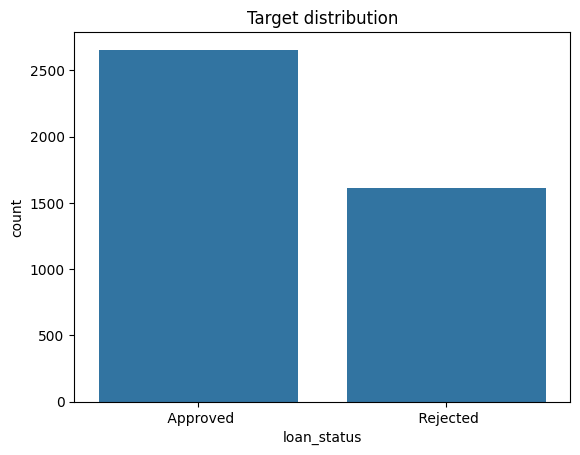

In [14]:
print('Using target column:', target_col)
display(df[target_col].value_counts(dropna=False))
sns.countplot(x=target_col, data=df)
plt.title('Target distribution')
plt.show()

In [15]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing>0]

Series([], dtype: int64)

In [16]:
target_col = "loan_status"
id_cols = ["loan_id"] 

In [17]:
df = df.drop(columns=id_cols, errors="ignore")

In [18]:
df_clf = df.dropna(subset=[target_col]).copy()

In [19]:
X = df_clf.drop(columns=[target_col])
y = df_clf[target_col].copy()

# Feature types & drop id

In [20]:
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

In [21]:
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['education', 'self_employed']
Numerical columns: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


# Preprocessing pipeline

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [24]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [25]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')

# Stage-1 : Classification baseline

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [27]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [28]:
y.head()

0     Approved
1     Rejected
2     Rejected
3     Rejected
4     Rejected
Name: loan_status, dtype: object

In [29]:
unique_vals = sorted(y.unique())

unique_vals

[' Approved', ' Rejected']

In [30]:
y = df_clf[target_col].astype(str).str.strip().str.lower()

In [32]:
unique_vals = sorted(y.unique())

unique_vals

['approved', 'rejected']

In [33]:
y = (y == 'approved').astype(int)

In [34]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train/test sizes:", X_train.shape, X_test.shape)

Train/test sizes: (3415, 11) (854, 11)


# Fit RF baseline pipelines

In [36]:
# Random Forest baseline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rf', RandomForestClassifier(n_estimators=200, random_state=42, oob_score=True))])

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'rf__n_estimators': [100, 200, 300, 400],
    'rf__max_depth': [None, 4, 8, 10],
    'rf__max_features': ['sqrt', None]
}
grid = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best params (RF):", grid.best_params_)
best_clf = grid.best_estimator_
y_pred_best = best_clf.predict(X_test)
print(classification_report(y_test, y_pred_best))

Best params (RF): {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [38]:
# Random Forest baseline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rf', RandomForestClassifier(n_estimators=200, max_depth=None, max_features='sqrt', random_state=42, oob_score=True))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
print('Random Forest:')
print(classification_report(y_test, y_pred_rf))
print('RF OOB score (if available):', getattr(rf_pipeline.named_steps['rf'],'oob_score_', None))

Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

RF OOB score (if available): 0.9797950219619327


In [344]:
rf_pipeline

,steps,"[('preprocessor', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Stage 2 

In [345]:
# Numerical columns: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

In [39]:
df["loan_status"].unique()

array([' Approved', ' Rejected'], dtype=object)

In [40]:
df['loan_status'] = df['loan_status'].str.strip()

In [41]:
df['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

In [43]:
# Filter data for approved loans only
approved_df = df[df["loan_status"] == "Approved"].copy()

#Only return data with approved status

In [44]:
approved_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
6,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
8,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
10,4,Graduate,Yes,2900000,11200000,2,547,8100000,4700000,9500000,3100000,Approved
13,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved


In [45]:
reg_target = "loan_amount"
reg_df = approved_df.dropna(subset=[reg_target]).copy()

In [46]:
X_reg = reg_df.drop(columns=[reg_target])
y_reg = reg_df[reg_target]

In [47]:
num_cols_reg = X_reg.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols_reg = X_reg.select_dtypes(include=['object']).columns.tolist()

In [48]:
print("Regression Numerical:", num_cols_reg)
print("Regression Categorical:", cat_cols_reg)

Regression Numerical: ['no_of_dependents', 'income_annum', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Regression Categorical: ['education', 'self_employed', 'loan_status']


In [49]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [50]:
reg_preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols_reg),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols_reg)
    ]
)

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
reg_pipe = Pipeline(steps=[
    ('preprocessor', reg_preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [53]:
param_grid_reg = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 5, 10],
    "model__min_samples_split": [2, 5, 10]
}

In [54]:
grid_reg = GridSearchCV(
    reg_pipe,
    param_grid_reg,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

# Xr_train, Xr_test, yr_train, yr_test
grid_reg.fit(Xr_train, yr_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [None, 5, ...], 'model__min_samples_split': [2, 5, ...], 'model__n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [55]:
print("Best Regression Params:", grid_reg.best_params_)
best_reg = grid_reg.best_estimator_

Best Regression Params: {'model__max_depth': 5, 'model__min_samples_split': 10, 'model__n_estimators': 300}


In [56]:
grid_reg.best_score_

np.float64(0.8678578718038459)

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
reg_pipe = Pipeline(steps=[
    ('preprocessor', reg_preprocessor),
    ('model', RandomForestRegressor(max_depth=5, min_samples_split=10,n_estimators=300, random_state=42))
])

reg_pipe.fit(Xr_train, yr_train)

# Xr_train, Xr_test, yr_train, yr_test
yr_pred = reg_pipe.predict(Xr_test)
print("Regression metrics on approved applicants:")
print("RMSE:", mean_squared_error(yr_test, yr_pred))
print("MAE:", mean_absolute_error(yr_test, yr_pred))
print("R2:", r2_score(yr_test, yr_pred))

Regression metrics on approved applicants:
RMSE: 10794004746004.68
MAE: 2451526.9067810844
R2: 0.8744177380038414


# Save artifacts and combined predict function

In [60]:
import joblib

In [61]:
joblib.dump(rf_pipeline, 'stage_1_rf_classifier_pipeline.pkl')
joblib.dump(reg_pipe, 'stage_2_rf_regression_pipeline.pkl')

['stage_2_rf_regression_pipeline.pkl']

# Prediction Function

In [62]:
clf = joblib.load('./stage_1_rf_classifier_pipeline.pkl')
reg = joblib.load('./stage_2_rf_regression_pipeline.pkl')

In [64]:
def two_stage_predict(applicant_df):
    out = {}

    # Stage 1
    approve = clf.predict(applicant_df)[0]
    print(approve)
    out['loan_status'] = int(approve)

    if approve == 1:
        # ADD predicted loan_status column to input
        applicant_df_reg = applicant_df.copy()
        applicant_df_reg['loan_status'] = 'Approve'

        # Stage 2 prediction
        pred = reg.predict(applicant_df_reg)[0]
        out['regression_prediction'] = float(pred)
    else:
        print("Not approved")

    return out


In [65]:
example_row = X_test.iloc[[0]]
print("Example row:")
display(example_row)


Example row:


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2856,3,Not Graduate,Yes,8300000,31400000,6,674,1000000,1600000,17200000,6100000


In [66]:
example_row.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 2856 to 2856
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          1 non-null      int64 
 1   education                 1 non-null      object
 2   self_employed             1 non-null      object
 3   income_annum              1 non-null      int64 
 4   loan_amount               1 non-null      int64 
 5   loan_term                 1 non-null      int64 
 6   cibil_score               1 non-null      int64 
 7   residential_assets_value  1 non-null      int64 
 8   commercial_assets_value   1 non-null      int64 
 9   luxury_assets_value       1 non-null      int64 
 10  bank_asset_value          1 non-null      int64 
dtypes: int64(9), object(2)
memory usage: 96.0+ bytes


In [69]:
print(reg.feature_names_in_)

['no_of_dependents' 'education' 'self_employed' 'income_annum' 'loan_term'
 'cibil_score' 'residential_assets_value' 'commercial_assets_value'
 'luxury_assets_value' 'bank_asset_value' 'loan_status']


In [70]:
print("Two-stage prediction:", two_stage_predict(example_row))

1
Two-stage prediction: {'loan_status': 1, 'regression_prediction': 24637856.00076444}


In [71]:
user_input = {
    "no_of_dependents": int(input("No. of Dependents: ")),
    "education": input("Education (Graduate/Not Graduate): "),
    "self_employed": input("Self Employed (Yes/No): "),
    "income_annum": float(input("Annual Income: ")),
    "loan_amount": float(input("Loan Amount Requested: ")),
    "loan_term": int(input("Loan Term (in years): ")),
    "cibil_score": int(input("CIBIL Score: ")),
    "residential_assets_value": float(input("Residential Assets Value: ")),
    "commercial_assets_value": float(input("Commercial Assets Value: ")),
    "luxury_assets_value": float(input("Luxury Assets Value: ")),
    "bank_asset_value": float(input("Bank Asset Value: "))
}

applicant_df = pd.DataFrame([user_input])

result = two_stage_predict(applicant_df)

print("Final Output:")
print(result)

0
Not approved
Final Output:
{'loan_status': 0}


In [ ]:
list(user_input.keys())

['no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [ ]:
try:
    print("FEATURE IMPORTANCES:")
    for col, score in zip(list(user_input.keys()), rf_pipeline.named_steps["rf"].feature_importances_):
        print(f"{col:30s} : {score:.4f}")
except:
    print("Cannot extract feature importance (maybe pipeline wrapped).")

FEATURE IMPORTANCES:
no_of_dependents               : 0.0038
education                      : 0.0247
self_employed                  : 0.0350
income_annum                   : 0.0852
loan_amount                    : 0.8190
loan_term                      : 0.0064
cibil_score                    : 0.0077
residential_assets_value       : 0.0097
commercial_assets_value        : 0.0059
luxury_assets_value            : 0.0005
bank_asset_value               : 0.0004


In [ ]:
sample = pd.DataFrame([{
    "no_of_dependents": 1,
    "education": "Graduate",
    "self_employed": "No",
    "income_annum": 1200000,
    "loan_amount": 300000,
    "loan_term": 12,
    "cibil_score": 820,
    "residential_assets_value": 2000000,
    "commercial_assets_value": 500000,
    "luxury_assets_value": 0,
    "bank_asset_value": 550000
}])

print("Notebook pipeline:", rf_pipeline.predict(sample))
loaded = joblib.load('stage_1_rf_classifier_pipeline.pkl')
print("Saved pipeline:", loaded.predict(sample))
print("Saved predict_proba:", loaded.predict_proba(sample))

Notebook pipeline: [1]
Saved pipeline: [1]
Saved predict_proba: [[0.075 0.925]]
